In [21]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import segmentation
import cv2

%matplotlib inline

In [22]:
image = plt.imread('test.png')

(1155, 1759)

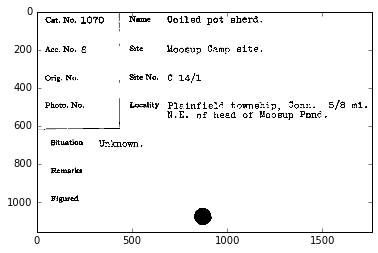

In [23]:
plt.imshow(image,cmap=plt.cm.gray)
image.shape

477


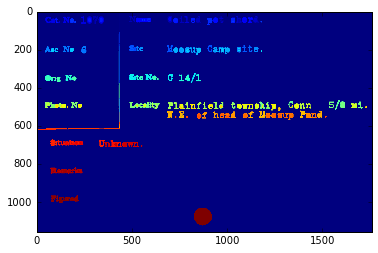

In [24]:
seg = segmentation.felzenszwalb(image,scale=5,sigma=.25,min_size=50)
plt.imshow(seg)
print(np.max(seg))

/Users/Darius/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))
/Users/Darius/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


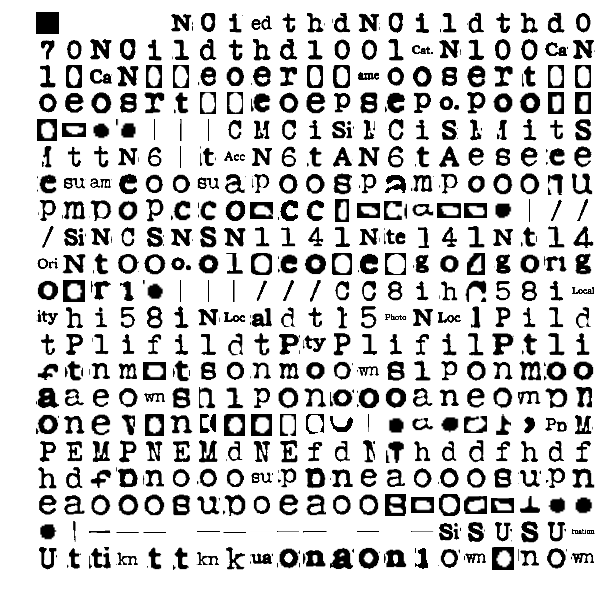

In [26]:
def bbox2(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return rmin, rmax, cmin, cmax

plt.figure(1,figsize=(10,10))
buf = 3
for i in range(441):
    x1,x2,y1,y2 = bbox2(seg==i)
    plt.subplot(21,21,i+1)
    plt.imshow(image[x1-buf:x2+buf,y1-buf:y2+buf],cmap=plt.cm.gray)
    plt.axis('off')